July 9th, 2025

## Oblique electrostatic waves
#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy
from scipy.sparse import diags
from QLT_equations.general_plasma_equations import Z, Z_prime, I, J

In [3]:
 from scipy.ndimage import gaussian_filter

In [4]:
%matplotlib inline
import matplotlib
font = {'family' : 'sans-serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

### Oblique electrostatic waves
We proceed to normalize the physical quantities as follows:
\begin{align*}
   t &\coloneqq t^{d}|\Omega_{ce}|, \qquad \omega \coloneqq \frac{\omega^{d}}{|\Omega_{ce}|}, \qquad \vec{k} \coloneqq d_{e} \vec{k}^{d}, \qquad \omega_{pe} \coloneqq \frac{\omega_{pe}^{d}}{|\Omega_{ce}|}, \qquad \alpha_{\perp c} \coloneqq \frac{\alpha_{\perp c}^{d}}{d_{e} |\Omega_{ce}|}, \qquad  \mathcal{E}_{E}(k_{\perp}, t) \coloneqq \frac{|\delta \vec{\hat{E}}(k_{\perp}, t)|^2}{d_{e}^3 \Omega_{ce}^2 m_{e} n_{e}}, \\
   T_{\perp c} &\coloneqq \frac{T_{\perp c}^{d}}{d_{e}^2 \Omega_{ce}^2 m_{e}}, \qquad n_{c} \coloneqq \frac{n_{c}^{d}}{n_{e}}, \qquad \mathcal{E}_{B}(k_{\|}, t) \coloneqq \frac{|\delta \vec{\hat{B}}(k_{\|}, t)|^2}{d_{e}^3 \Omega_{ce}^2 m_{e} n_{e}}, \qquad K_{\perp c} \coloneqq \frac{K_{\perp c}^{d}}{d_{e}^2 \Omega_{ce}^2 m_{e} n_{e}},
\end{align*}
The dispersion relation is 
\begin{equation*}
    |\vec{k}|^2 + 2 n_{c}\frac{\omega_{pe}^2}{\alpha_{\| c}^2} \left[ 1 +   \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) Z(\xi_{c}^{n}) \left[\xi_{c}^{0} + \frac{n}{k_{\|} \alpha_{\| c}} \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} -1\right]\right]\right] = \frac{\omega_{pi}^2}{\alpha_{i}^2} \left|J_{1}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)\right|^2 Z'\left(\frac{\omega -\omega_{0}}{k \alpha_{i}}\right).
\end{equation*}
\begin{align*}
    |\vec{k}| &\coloneqq  \sqrt{k_{\perp}^2 + k_{\|}^2}\\
    \lambda_{c} &\coloneqq \frac{k_{\perp}^2 \alpha_{\perp c}^2}{2}\\
    \xi_{c}^{n} &\coloneqq \frac{\omega - n |\Omega_{ce}|}{k_{\|} \alpha_{\|c}}
\end{align*} 


\begin{align}
    F(\vec{k}, \omega) &\coloneqq |\vec{k}|^2  + 2 \frac{n_{c}}{n_{e}} \frac{\omega_{pe}^2}{\alpha_{\| c}^2}  \left[ 1 +   \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) Z(\xi_{c}^{n}) \left[\xi_{c}^{0} +  \frac{n |\Omega_{ce}|}{k_{\|} \alpha_{\| c}} \left[ 1-\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} \right]\right]\right], \\
    \Theta_{m'}(\vec{k}, \omega) &\coloneqq \frac{\omega_{pi}^2}{2 v_{ti}} \sum_{m=-\infty}^{\infty}  J_{m}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)  J_{m'-m}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right) Z' \left( \frac{\omega + m \omega_{0}}{\sqrt{2} v_{ti} |\vec{k}|}\right).\\
     F(\vec{k}, \omega' + p\omega_{0}) \tilde{\phi}_{p}(\vec{k}) &= \sum_{m'=-\infty}^{\infty}  \Theta_{m'}(\vec{k}, \omega' + [p - m']\omega_{0}) \tilde{\phi}_{p-m'}(\vec{k}) \qquad \Rightarrow \qquad \mathrm{det}\left(\mathcal{D}(\vec{k}, \omega)\right) = 0\\
    \mathcal{D}_{n, m'}(\vec{k}, \omega) &\coloneqq F(\vec{k}, \omega' + n\omega_{0}) \delta_{n, m'} - \Theta_{n-m'}(\vec{k}, \omega' + m' \omega_{0})
\end{align}


In [56]:
# parameters from 2021 paper 
# normalization (Vadim parameters)
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
omega_0 = 0.57 # Omega_ce
omega_pe = 4 # Omgea_{ce}

n_c = 0.8 # n^e_0

# thermal velocity 
alpha_c_perp = 0.0079 * np.sqrt(10) # d_e x Omega_ce
alpha_c_par = alpha_c_perp # d_e x Omega_ce
alpha_i =  alpha_c_perp / np.sqrt(1836) # d_e x Omega_ce

v_0 = 1.4 * alpha_c_perp # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

In [57]:
def sum_bessel(lambda_, omega, kz, alpha_c_par_, alpha_c_perp_, n_max=20):
    res = 0
    for n in range(-n_max, n_max + 1):
        xi_0 = omega / (kz * alpha_c_par_)
        xi_n = (omega - n) / (kz * alpha_c_par_)
        ani_term = n / kz / alpha_c_par_ * ((alpha_c_par_ ** 2) / (alpha_c_perp_ ** 2) - 1)
        res += I(m=n, Lambda=lambda_) * Z(z=xi_n) * (xi_0 + ani_term)
    return res


def electron_response(n_c_, omega_pe_, alpha_c_perp_, alpha_c_par_, omega, kz, ky, n_max=20):
    # Bessel argument electron
    lambda_ = 0.5 * ((ky * alpha_c_perp_) ** 2)
    return 2 * n_c_ * ((omega_pe_ ** 2) / (alpha_c_par_ ** 2)) * (
            1 + sum_bessel(lambda_=lambda_, omega=omega, kz=kz, n_max=n_max,
                           alpha_c_par_=alpha_c_par_, alpha_c_perp_=alpha_c_perp_))


def THETA(omega_pi_, alpha_i_, n, M, ky, v_0_, omega_0_, omega, kz, m_max=20):
    # magnitude of the wavevector
    k_abs = np.sqrt(ky ** 2 + kz ** 2)
    # Bessel argument ion Doppler-shifted
    a = ky * np.abs(v_0_) / omega_0_
    res = 0
    for m in range(-m_max, m_max + 1):
        res += (omega_pi_ ** 2) / (alpha_i_ ** 2) * J(m=m - n, Lambda=-a) * J(m=m - M, Lambda=-a) \
               * Z_prime(z=(omega + m * omega_0_) / (alpha_i_ * k_abs))
    return res


def D_matrix_opal(omega, ky, kz, n_c_, omega_pe_, alpha_c_par_, alpha_c_perp_, omega_0_, v_0_, alpha_i_, omega_pi_,
                  N=5):
    # initialize matrix
    D_mat = np.zeros((N * 2 + 1, N * 2 + 1), dtype="complex128")
    k2 = ky ** 2 + kz ** 2
    for n in range(-N, N + 1):
        i1 = n + N
        # cold electron components
        D_mat[i1, i1] += k2 + electron_response(n_c_=n_c_, omega_pe_=omega_pe_,
                                                alpha_c_par_=alpha_c_par_,
                                                alpha_c_perp_=alpha_c_perp_, omega=omega + n * omega_0_,
                                                kz=kz, ky=ky)

        for M in range(-N, N + 1):
            i2 = M + N
            D_mat[i1, i2] += -THETA(omega_pi_=omega_pi_, alpha_i_=alpha_i_, n=n, M=M, ky=ky,
                                    v_0_=v_0_, omega_0_=omega_0_, omega=omega, kz=kz)
    return D_mat


def ion_response(omega_pi_, alpha_i_, m_star_, ky, v_0_, omega_0_, omega, kz):
    k_abs = np.sqrt(ky ** 2 + kz ** 2)
    # Bessel argument ion Doppler-shifted
    a = ky * np.abs(v_0_) / omega_0
    return (omega_pi_ ** 2) / (alpha_i_ ** 2) * (J(m=m_star_, Lambda=-a) ** 2) * Z_prime(
        z=(omega - omega_0_) / (alpha_i_ * k_abs))

In [58]:
def disp_k_approx(ky,
                  kz,
                  n_c_,
                  omega_pe_=omega_pe,
                  omega_pi_=omega_pi,
                  omega_0_=omega_0,
                  v_0_=v_0,
                  alpha_i_=alpha_i,
                  alpha_c_perp_=alpha_c_perp,
                  alpha_c_par_=alpha_c_par,
                  m_star=-1):
    return lambda omega: ky ** 2 + kz ** 2 \
                         + electron_response(n_c_=n_c_, omega_pe_=omega_pe_, alpha_c_par_=alpha_c_par_,
                                             alpha_c_perp_=alpha_c_perp_, omega=omega, kz=kz, ky=ky) \
                         - ion_response(omega_pi_=omega_pi_, alpha_i_=alpha_i_, m_star_=m_star, ky=ky, v_0_=v_0_,
                                        omega_0_=omega_0_, omega=omega, kz=kz)


def disp_k_full(ky,
                kz,
                n_c_,
                omega_pe_=omega_pe,
                omega_pi_=omega_pi,
                omega_0_=omega_0,
                v_0_=v_0,
                alpha_i_=alpha_i,
                alpha_c_perp_=alpha_c_perp,
                alpha_c_par_=alpha_c_par):
    return lambda omega: np.linalg.det(
        D_matrix_opal(omega=omega, ky=ky, kz=kz, n_c_=n_c_, omega_pe_=omega_pe_, alpha_c_par_=alpha_c_par_,
                      alpha_c_perp_=alpha_c_perp_, omega_0_=omega_0_, v_0_=v_0_,
                      alpha_i_=alpha_i_, omega_pi_=omega_pi_))

In [59]:
ky_ = 11
kz_ = np.sqrt((omega_0 ** 2) / (1 - omega_0 ** 2)) * ky_
sol_approx = scipy.optimize.newton(disp_k_approx(ky=ky_, kz=kz_, n_c_=0.8), omega_0 + 1e-3j, tol=1e-15)
print(sol_approx)
print("omega_k + i gamma = ", sol_approx)
print("dispersion residual approx = ", abs(disp_k_approx(ky=ky_, kz=kz_, n_c_=0.8)(sol_approx)))

sol_full = scipy.optimize.newton(disp_k_full(ky=ky_, kz=kz_, n_c_=0.8), sol_approx, tol=1e-15, maxiter=100)
print(sol_full)
print("omega_k + i gamma = ", sol_full)
print("dispersion residual full = ", abs(disp_k_full(ky=ky_, kz=kz_, n_c_=0.8)(sol_full)))

(0.5625023053054428+0.01479113248810796j)
omega_k + i gamma =  (0.5625023053054428+0.01479113248810796j)
dispersion residual approx =  2.617026803405025e-11
(0.570000000000792+0.016903311843084797j)
omega_k + i gamma =  (0.570000000000792+0.016903311843084797j)
dispersion residual full =  2.241730359552836e+19


In [77]:
ky_ = np.linspace(0.9, 20, 50)
kz_ = np.sqrt((omega_0 ** 2) / (1 - omega_0 ** 2)) * ky_
n_c_ = np.linspace(0.75, 0.85, 3)

sol_approx_ = np.zeros((len(ky_), len(n_c_)), dtype="complex128")
sol_full_ = np.zeros((len(ky_), len(n_c_)), dtype="complex128")
k_abs = np.zeros((len(ky_)))

In [78]:
for jj in range(len(n_c_)):
    for ii in range(len(ky_)):
        k_abs[ii] = np.sqrt(ky_[ii] ** 2 + kz_[ii] ** 2)
        try:
            sol_approx_[ii, jj] = scipy.optimize.newton(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), x0=omega_0 + 1e-3j, tol=1e-15, maxiter=100, x1=omega_0*0.99 + 1e-2j)
            sol_full_[ii, jj] = scipy.optimize.newton(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), sol_approx_[ii, jj], tol=1e-15, maxiter=100,  x1=omega_0*0.99 + 1e-2j)
    
        except:
            print("dispersion residual approx = ", abs(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_approx_[ii, jj])))
            print("dispersion residual full = ", abs(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_full_[ii, jj])))

dispersion residual approx =  38456.57553879854
dispersion residual full =  295940914725.2651
dispersion residual approx =  41020.26725486969
dispersion residual full =  710272538149.0042
dispersion residual approx =  4.214199354112124e-13
dispersion residual full =  953640351170373.0
dispersion residual approx =  43583.958970940825
dispersion residual full =  1563410527386.392


In [79]:
# sol_full_[np.where(sol_full_.imag>0.011)] = 0
# sol_full_[np.where(sol_approx_.imag>0.015)] = 0

In [80]:
sol_full = np.copy(sol_full_)
sol_full.real[np.where(sol_full_.imag<1e-5)] = 0

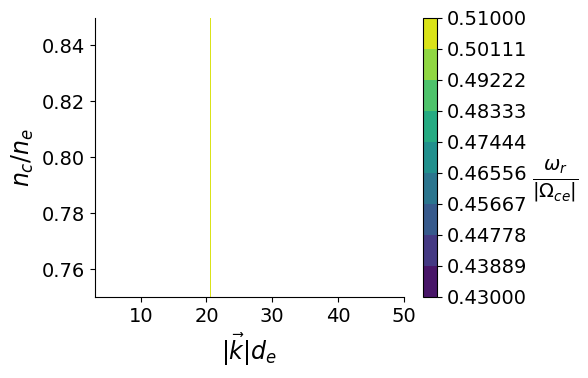

In [81]:
fig, ax = plt.subplots(figsize=(6, 4))
pos = ax.contourf(k_abs, n_c_, gaussian_filter(sol_full.real.T, sigma=0.5), vmin=0.43, vmax=0.51, levels=np.linspace(0.43, 0.51, 10))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
#cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
ax.set_xlim(3, 50)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig("../../figs/vadim_2021/oblique_n_c_full_real.png", dpi=300, bbox_inches='tight')

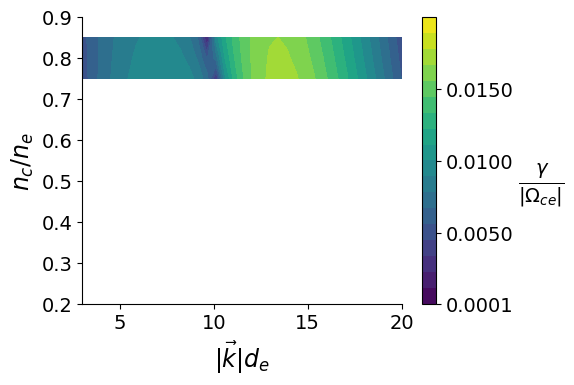

In [82]:
fig, ax = plt.subplots(figsize=(6, 4))
pos = ax.contourf(k_abs, n_c_, gaussian_filter(sol_full_.imag.T, sigma=0.), vmin=1e-4, vmax=0.02, levels=np.linspace(1e-4, 0.02, 19))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_xlim(3, 20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig("../../figs/vadim_2021/oblique_n_c_full_imag.png", dpi=300, bbox_inches='tight')

In [83]:
sol_approx_[np.where(sol_approx_.imag>0.02)] = 0

In [84]:
sol_approx_.real[np.where(sol_approx_.imag<1e-5)] = 0

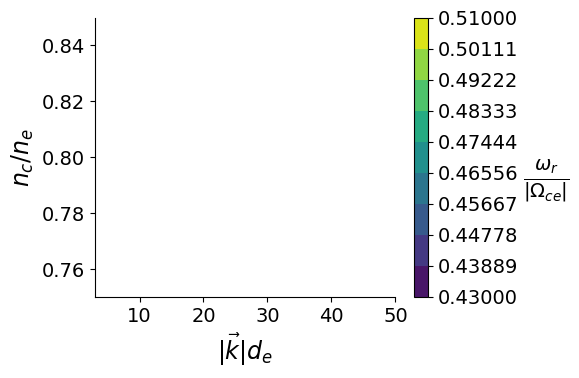

In [85]:
fig, ax = plt.subplots(figsize=(6, 4))
pos = ax.contourf(k_abs, n_c_, gaussian_filter(sol_approx_.real.T, sigma=0.), vmin=0.43, vmax=0.51, levels=np.linspace(0.43, 0.51, 10))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
#cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])

ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(3, 50)
plt.tight_layout()
#plt.savefig("../../figs/vadim_2021/oblique_n_c_approx_real.png", dpi=300, bbox_inches='tight')

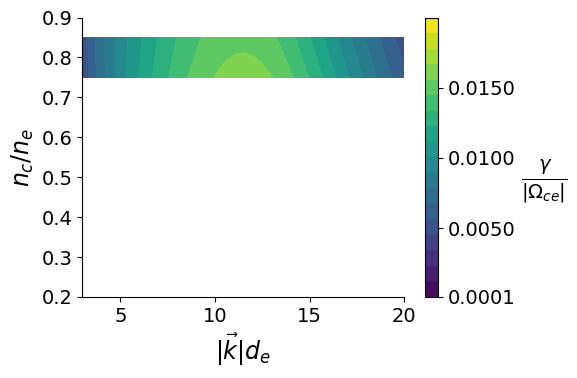

In [86]:
fig, ax = plt.subplots(figsize=(6, 4))
pos = ax.contourf(k_abs, n_c_, gaussian_filter(sol_approx_.imag.T, sigma=0.), vmin=1e-4, vmax=0.02, levels=np.linspace(1e-4, 0.02, 19))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])

ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(3, 20)
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.tight_layout()
#plt.savefig("../../figs/vadim_2021/oblique_n_c_approx_imag.png", dpi=300, bbox_inches='tight')

In [87]:
n_c_

array([0.75, 0.8 , 0.85])

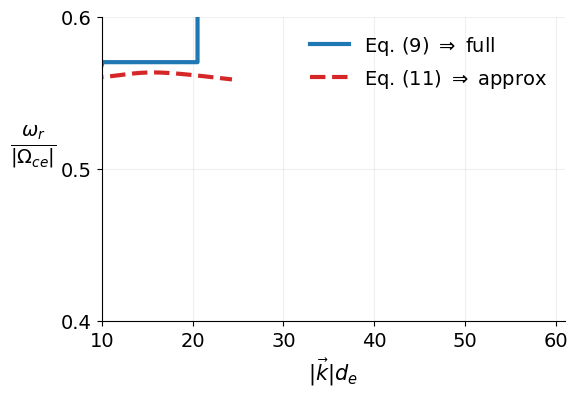

In [92]:
fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(k_abs, sol_full_[:, 1].real, linewidth=3, color="tab:Blue", label="Eq. (9) $\Rightarrow$ full")
ax.plot(k_abs, sol_approx_[:,1].real, linewidth=3, ls="--", color="tab:red", label="Eq. (11) $\Rightarrow$ approx")


ax.set_ylabel(r'$\frac{\omega_r}{|\Omega_{ce}|}$', fontsize=20, labelpad=20, rotation=0)
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=15)

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="upper right")
legend.get_frame().set_alpha(0)

ax.set_ylim(0, 0.7)
ax.set_xlim(10, 61)
ax.set_ylim(0.4, 0.6)
ax.set_yticks([0.4, 0.5, 0.6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.2)
plt.tight_layout()
#plt.savefig("../figs/vadim_2021/vadim_fig5_c.png", dpi=300, bbox_inches='tight')

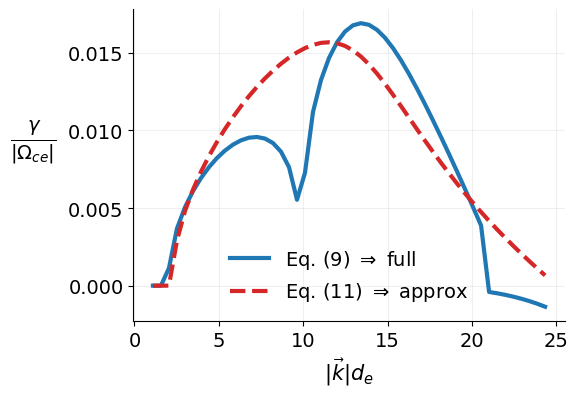

In [93]:
fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(k_abs, sol_full_[:, 1].imag, linewidth=3, color="tab:Blue", label="Eq. (9) $\Rightarrow$ full")
ax.plot(k_abs, sol_approx_[:, 1].imag, linewidth=3, ls="--", color="tab:red", label="Eq. (11) $\Rightarrow$ approx")


ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', fontsize=20, labelpad=25, rotation=0)
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=15)

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="lower center")
legend.get_frame().set_alpha(0)


#ax.set_ylim(-0.0005, 0.012)
#ax.set_yticks([0, 0.005, 0.01])
#ax.set_yticklabels([0, 0.005, 0.01])
#ax.set_xlim(10, 61)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.2)
plt.tight_layout()
#plt.savefig("../figs/vadim_2021/vadim_fig5_d.png", dpi=300, bbox_inches='tight')

In [90]:
k_perp = 20
k_par =  np.sqrt((omega_0**2) / (1-omega_0**2))*k_perp
omega_ = np.linspace(0.1, 3, 500)

In [91]:
electron_feedback = k_perp**2 + k_par**2 + electron_response(n_c=n_c, omega_pe=omega_pe,
                                                             alpha_c_perp=alpha_c_perp, alpha_c_par=alpha_c_par,
                                                             omega=omega_,
                                                             kz=k_par, ky=k_perp, n_max=50)

TypeError: electron_response() got an unexpected keyword argument 'n_c'

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(omega_, np.abs(electron_feedback), color="blue", ls="--", linewidth=3, label="electron")

ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=0, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="pink",  linewidth=3, label="ion  $m=0$")
ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=-1, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="orange",  linewidth=3, label="ion  $m=-1$")
ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=-2, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="red",  linewidth=3, label="ion $m=-2$")
ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=-3, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="green",  linewidth=3, label="ion $m=-3$")
ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=-4, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="purple",  linewidth=3, label="ion $m=-4$")

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="lower right")
#legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel("$\omega$")
ax.set_ylabel("$|D(k_{\perp} =190, \omega)|$")
ax.set_yscale("symlog")
# plt.savefig("../figs/vadim_2021/sidebands_oblique.png", dpi=600)